9.5 Code up a method to compute the polynomial $B_n[f]$ for any $n \in \mathbb{N}$ and any callable function $f$. Use your code to reproduce the plots in Figure 9.2.

In [41]:
import numpy as np
from math import comb # or scipy.special.binom/comb
import matplotlib.pyplot as plt

def bernstein(n, k):
    '''Return a callable kth Bernstein polynomial of degree n'''
    return lambda x: comb(n,k) * x**k * (1-x)**(n-k)

def bern(f, n):
    '''Return nth-degree Bernstein transformation of f.

    Parameters:
        f: callable function from R to R
        n: positive int
    Return:
        callable function B_n[f] to be evaluated at x in [0,1]
    '''
    return lambda x: sum(f(k/n) * bernstein(n, k)(x) for k in range(n+1))

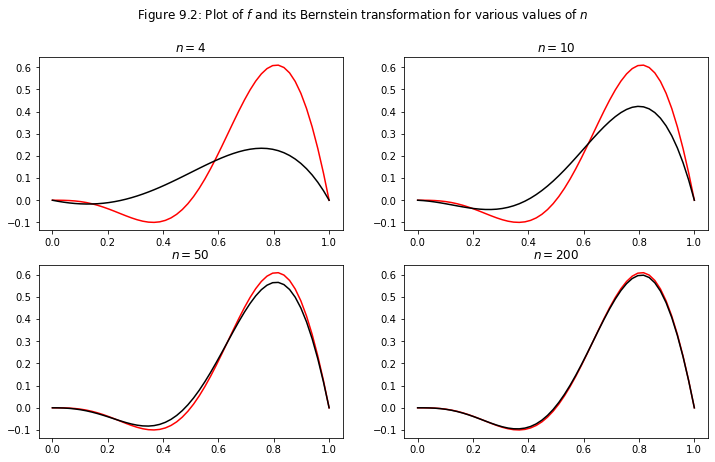

In [45]:
### Re-create Figure 9.2
f = lambda x: x**2 * np.sin(2*np.pi*x + np.pi)

# Values of n
N = (4, 10, 50, 200)

# Figure
fig, axs = plt.subplots(2, 2, figsize=(12,7))
axs = axs.ravel()

x = np.linspace(0,1,50)
for n, ax in zip(N, axs):
    # Plot f
    ax.plot(x, f(x), 'r')

    # Plot Bernstein transformation
    b = bern(f, n)
    ax.plot(x, b(x), 'k')

    ax.set_title(f'$n={n}$')

fig.suptitle('Figure 9.2: Plot of $f$ and its Bernstein transformation for various values of $n$')

# Show
plt.show()